In [136]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tfac.figures.figureCommon import subplotLabel, getSetup
from tfac.tensor import cp_decomp, find_R2X_parafac, reorient_factors
from tfac.Data_Mod import form_tensor
from tfac.figures.figure1 import R2X_figure, treatmentPlot, timePlot, proteinPlot

In [137]:
tensor, treatments, times = form_tensor()
results = cp_decomp(tensor, 3)
comps = reorient_factors(results[1])


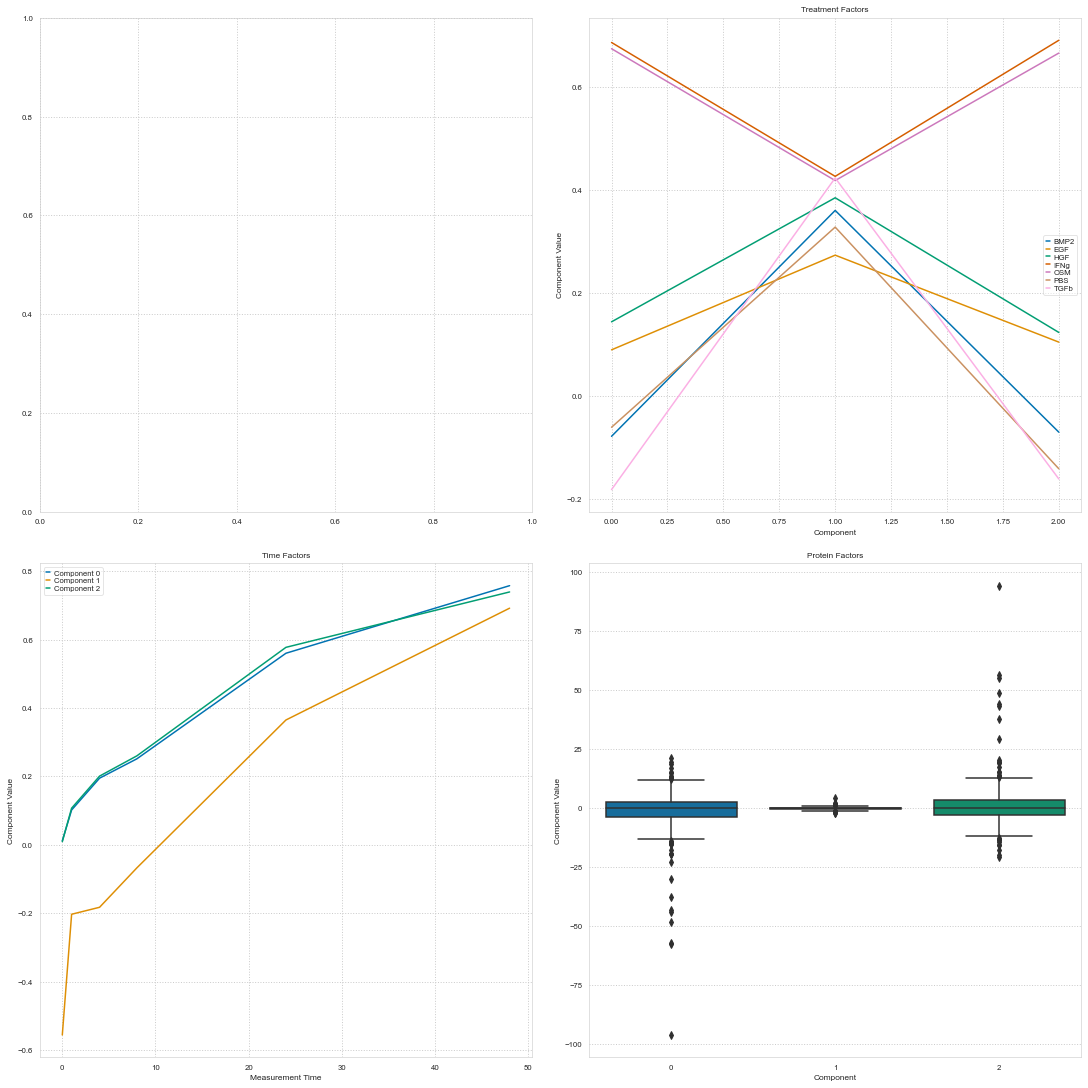

In [138]:
ax, f = getSetup((15, 15), (2, 2))
#R2X_figure(ax[0])
treatmentPlot(ax[1], comps[0], treatments)
timePlot(ax[2], comps[1])
proteinPlot(ax[3], comps[2], 1, 2)


In [139]:
df = pd.DataFrame(comps[2])
from tfac.dataHelpers import importLINCSprotein

proteins = importLINCSprotein()
columns = proteins.columns[3:298]

df["Proteins"] = columns

Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
prots = {}
for i in range(df.columns.size - 1):
    print(Q1[i] - 1.5*IQR[i], Q3[i] + 1.5*IQR[i])
    for row, col in df.iterrows():
        if((col[i]< (Q1[i] - 3 * IQR[i])) or (col[i] > (Q3[i] + 3 * IQR[i]))):
            print(col["Proteins"], '                ', np.round(col[i], 2))
            if col["Proteins"] not in prots:
                prots[col["Proteins"]] = 1
            else:
                prots[col["Proteins"]] += 1
    print()
display(prots)

-13.114544826303277 12.230960258921638
CDK1-R-C                  -37.55
Cyclin-B1-R-V                  -48.28
DUSP4-R-V                  -56.96
Myosin-IIa_pS1943-R-V                  -29.78
PAI-1-M-V                  -22.69
PLK1-R-C                  -44.04
Rb_pS807_S811-R-V                  -42.88
S6_pS235_S236-R-V                  -96.0
S6_pS240_S244-R-V                  -57.33

-1.027693771211127 1.0812081606087
ACC_pS79-R-V                  1.96
AMPKa_pT172-R-C                  1.93
Myosin-IIa_pS1943-R-V                  4.51
p21-R-V                  -2.02
PAR-R-C                  2.03
YAP-R-C                  -2.16

-12.077030042002836 12.94178249686923
CDK1-R-C                  37.63
Cyclin-B1-R-V                  48.63
DUSP4-R-V                  55.35
Myosin-IIa_pS1943-R-V                  29.41
PLK1-R-C                  43.96
Rb_pS807_S811-R-V                  43.19
S6_pS235_S236-R-V                  94.25
S6_pS240_S244-R-V                  56.55



{'CDK1-R-C': 2,
 'Cyclin-B1-R-V': 2,
 'DUSP4-R-V': 2,
 'Myosin-IIa_pS1943-R-V': 3,
 'PAI-1-M-V': 1,
 'PLK1-R-C': 2,
 'Rb_pS807_S811-R-V': 2,
 'S6_pS235_S236-R-V': 2,
 'S6_pS240_S244-R-V': 2,
 'ACC_pS79-R-V': 1,
 'AMPKa_pT172-R-C': 1,
 'p21-R-V': 1,
 'PAR-R-C': 1,
 'YAP-R-C': 1}

In [146]:
np.random.seed(1)
